In [2]:
import healpy as hp
import numpy as np
from turn import turn
from rot import rot
from shift_SW import shift_SW
import os
import astropy.units as u
import matplotlib.pyplot as plt
#hp.disable_warnings()
%matplotlib inline

In [13]:
# Set empty array for pixel data
nside = 128
m = np.zeros(hp.nside2npix(nside))

# Set galactic plane
gal_width = 20 * u.deg
galaxy_plane_pixels = hp.query_strip(nside, np.pi/2 - gal_width.to_value(u.radian),
                                     np.pi/2+ gal_width.to_value(u.radian))
m[galaxy_plane_pixels] = 10

# Set galatic centre
source_vector = hp.ang2vec(theta=np.pi/2, phi=0)
galactic_center_pixels = hp.query_disc(nside, source_vector, radius=(5*u.deg).to_value(u.radian))
m[galactic_center_pixels] = 50
#np.where(m ==50)

0.0 180.0 -180.0 180.0


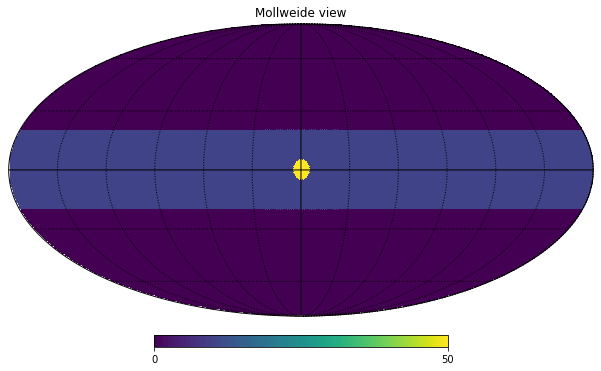

In [16]:
# Visualise map
hp.mollview(m)
m_smoothed = hp.smoothing(m, fwhm=(5*u.deg).to_value(u.radian))
#hp.mollview(m_smoothed ,title="Smoothed map")
#m_smoothed
hp.graticule();

0.0 180.0 -180.0 180.0


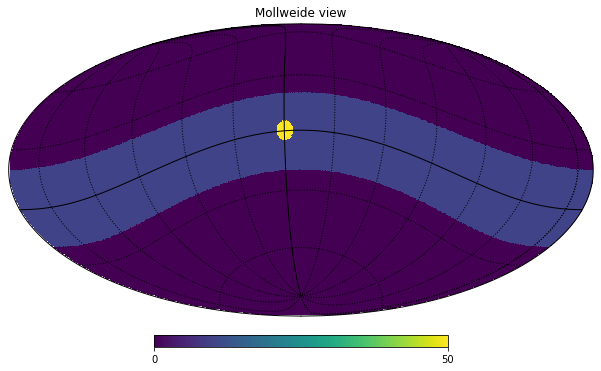

In [18]:
# Rotate map based on view
hp.mollview(m, rot=[-10, -20])
hp.graticule();

In [20]:
# Create custom rotator, sets input longitude and latitude as new center
longitude = 45 * u.deg
latitude = 45 * u.deg
rot_custom = hp.Rotator(rot=[longitude.to_value(u.deg), latitude.to_value(u.deg)], inv = True)
#rot_custom(0,0, lonlat=True)

0.0 180.0 -180.0 180.0


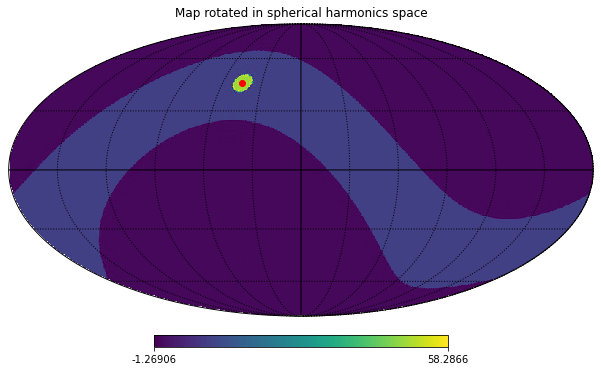

In [21]:
# Test .rotate_map_alms
test_rotated_alms = rot_custom.rotate_map_alms(m)
hp.mollview(test_rotated_alms, title="Map rotated in spherical harmonics space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_alms)


0.0 180.0 -180.0 180.0


[0. 0. 0. ... 0. 0. 0.]


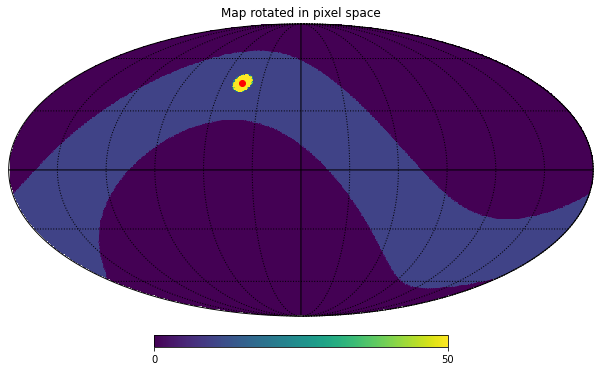

In [22]:
# Test .rotate_map_pixel
test_rotated_pixel = rot_custom.rotate_map_pixel(m)
hp.mollview(test_rotated_pixel, title="Map rotated in pixel space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
print(test_rotated_pixel)

0.0 180.0 -180.0 180.0


[0. 0. 0. ... 0. 0. 0.]


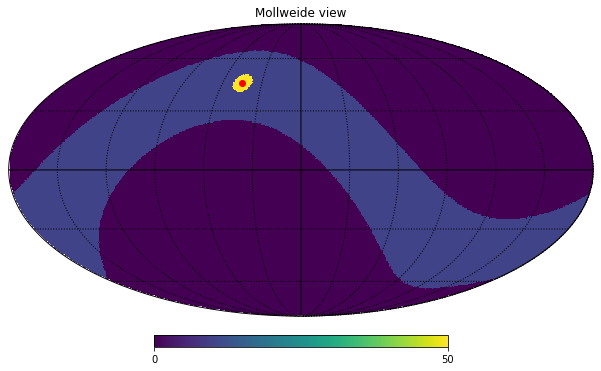

In [225]:
# Test previous rotate function
test_rotated_euler = rot(nside,m,[45,45,0])
hp.mollview(test_rotated_euler)
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
print(test_rotated_euler)

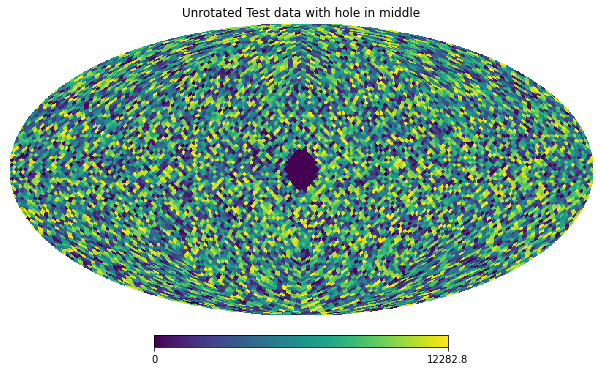

In [32]:
# Set random test data
nside = 32
npix = hp.nside2npix(nside)
test_pixels= np.random.uniform(0,npix-1,npix)
source_vector = hp.ang2vec(theta=np.pi/2, phi=0)

# Set galactic centre
galactic_center_pixels = hp.query_disc(nside, source_vector, radius=(10*u.deg).to_value(u.radian))
test_pixels[galactic_center_pixels] = 0

# Visualise map
hp.mollview(test_pixels, title = "Unrotated Test data with hole in middle")



(array([1281., 1255., 1216., 1251., 1181., 1202., 1211., 1230., 1207.,
        1254.]),
 array([    0.        ,  1228.53739822,  2457.07479643,  3685.61219465,
         4914.14959286,  6142.68699108,  7371.2243893 ,  8599.76178751,
         9828.29918573, 11056.83658394, 12285.37398216]),
 <BarContainer object of 10 artists>)

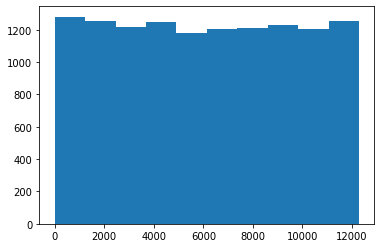

In [31]:
plt.hist(test_pixels)

0.0 180.0 -180.0 180.0


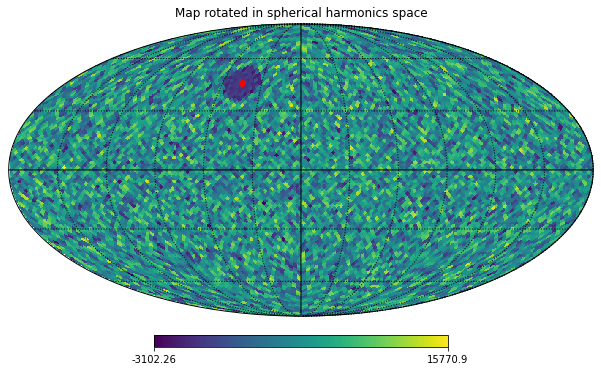

In [25]:
# Test .rotate_map_alms
test_rotated_alms = rot_custom.rotate_map_alms(test_pixels)
hp.mollview(test_rotated_alms, title="Map rotated in spherical harmonics space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_alms)


In [ ]:
plt.hist(test_pixels)

0.0 180.0 -180.0 180.0


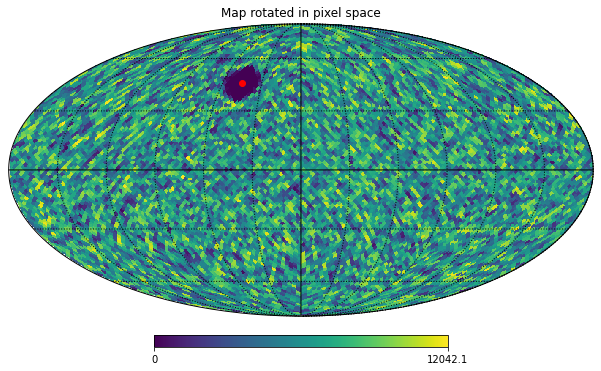

In [26]:
# Test .rotate_map_pixel
test_rotated_pixel = rot_custom.rotate_map_pixel(test_pixels)
hp.mollview(test_rotated_pixel, title="Map rotated in pixel space")
hp.projplot(45,45, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_pixel)

0.0 180.0 -180.0 180.0


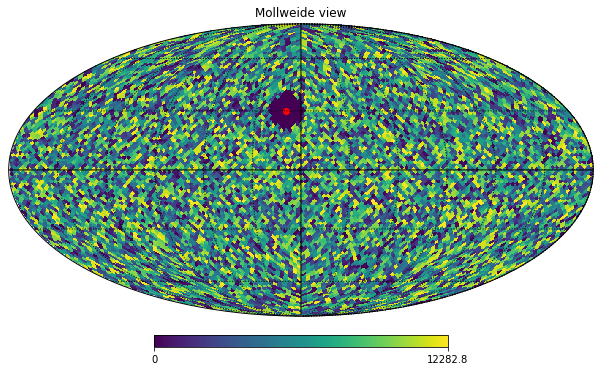

In [33]:
# Test previous rotate function
test_rotated_euler = rot(nside,test_pixels,[10,30,0])
hp.mollview(test_rotated_euler)
hp.projplot(10,30, 'ro', lonlat=True)
hp.graticule()
#print(test_rotated_euler)

In [29]:
#shift = shift_SW(nside,m)

#hp.mollview(shift, title = "Shift 1 pixel SW")
#np.where(shift ==50)


In [ ]:
hi
bye